In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("loan_approval_dataset_800.csv")
df

,age,gender,married,job_type,education,credit_score,loan_amount,dependents,property_area,loan_approved
0,29,male,no,salaried,graduate,798,194334,4,urban,1
1,45,female,yes,unemployed,graduate,340,508093,1,urban,0
2,24,male,yes,salaried,postgraduate,807,188898,0,urban,1
3,60,female,no,unemployed,postgraduate,327,52586,2,rural,0
4,44,female,yes,self-employed,undergraduate,581,971575,3,urban,0
...,...,...,...,...,...,...,...,...,...,...
795,47,male,yes,salaried,graduate,408,76809,4,semi-urban,0
796,48,female,yes,self-employed,graduate,522,607025,4,rural,1
797,51,male,yes,salaried,undergraduate,723,824740,4,semi-urban,0
798,55,male,no,salaried,graduate,559,669345,1,urban,0


In [4]:
label=LabelEncoder()
df["gender"]=label.fit_transform(df["gender"])
df["married"]=label.fit_transform(df["married"])
df["job_type"]=label.fit_transform(df["job_type"])
df["education"]=label.fit_transform(df["education"])
df["property_area"]=label.fit_transform(df["property_area"])
df


,age,gender,married,job_type,education,credit_score,loan_amount,dependents,property_area,loan_approved
0,29,1,0,0,0,798,194334,4,2,1
1,45,0,1,2,0,340,508093,1,2,0
2,24,1,1,0,1,807,188898,0,2,1
3,60,0,0,2,1,327,52586,2,0,0
4,44,0,1,1,2,581,971575,3,2,0
...,...,...,...,...,...,...,...,...,...,...
795,47,1,1,0,0,408,76809,4,1,0
796,48,0,1,1,0,522,607025,4,0,1
797,51,1,1,0,2,723,824740,4,1,0
798,55,1,0,0,0,559,669345,1,2,0


In [5]:
x=df.drop("loan_approved",axis=1)
y=df["loan_approved"]
y

0      1
1      0
2      1
3      0
4      0
      ..
795    0
796    1
797    0
798    0
799    1
Name: loan_approved, Length: 800, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train

,age,gender,married,job_type,education,credit_score,loan_amount,dependents,property_area
490,40,1,1,0,0,680,919775,0,0
671,63,0,1,2,0,392,97857,1,2
313,38,0,0,1,2,773,787534,2,1
438,25,1,1,0,1,379,73653,3,1
595,40,0,0,0,2,559,348568,2,2
...,...,...,...,...,...,...,...,...,...
16,64,0,1,0,2,502,58332,0,0
58,48,1,1,1,1,536,955383,2,0
277,31,1,0,0,0,556,829014,1,1
255,56,1,0,0,2,492,253931,3,0


In [7]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [8]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [9]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:73.75%


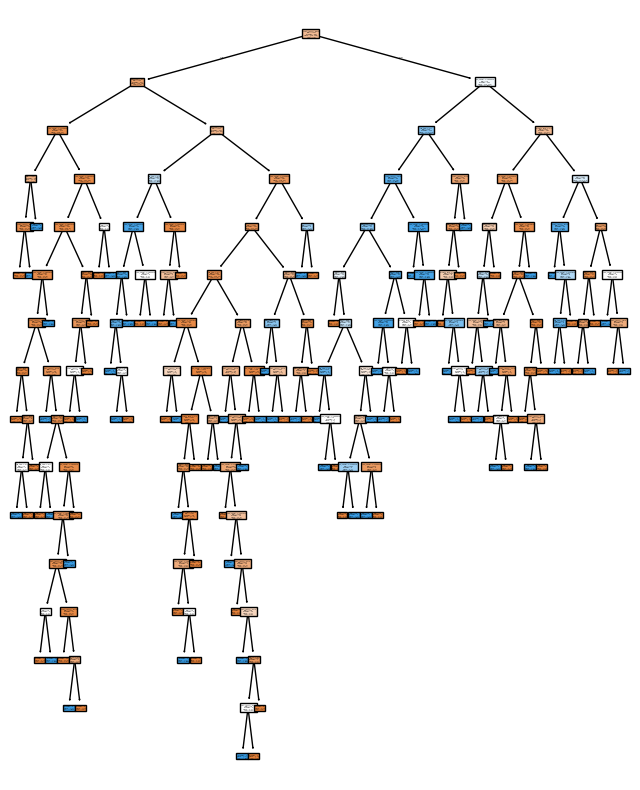

In [10]:
plt.figure(figsize=(8,10))
plot_tree(model,feature_names=["age","gender","married","job_type","education","credit_score","loan_amount","dependents","property_area"],class_names=["play","no play"],filled=True)
plt.show()

In [14]:
data=pd.DataFrame({
    "age":["29"],
    "gender":["male"],
    "married":["no"],
    "job_type":["unemployed"],
    "education":["graduate"],
    "credit_score":["798"],
    "loan_amount":["194334"],
    "dependents":["4"],
    "property_area":["rural"],


   

    

})
data["age"]=label.fit_transform(data["age"])
data["gender"]=label.fit_transform(data["gender"])
data["married"]=label.fit_transform(data["married"])
data["job_type"]=label.fit_transform(data["job_type"])
data["education"]=label.fit_transform(data["education"])
data["credit_score"]=label.fit_transform(data["credit_score"])
data["loan_amount"]=label.fit_transform(data["loan_amount"])
data["dependents"]=label.fit_transform(data["dependents"])
data["property_area"]=label.fit_transform(data["property_area"])

predict=model.predict(data)
predict

array([0])